In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [6]:
DATA_ROOT_DIR = '/content/drive/MyDrive/data/싸인랩_빅데이터분석/성창사'

In [7]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import pandas as pd
import numpy as np
import os

# 진행률 표시
from tqdm.auto import tqdm

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
""
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
mpl.rcParams['font.size'] = 23
mpl.rcParams['figure.figsize'] = (20, 20)
fm._rebuild()

# 한글 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
#mpl.rc('font', family='Malgun Gothic') #윈도우, 구글 콜랩
mpl.rc('font', family=font_name) #윈도우, 구글 콜랩
mpl.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

# 그림을 저장할 위치
IMAGES_PATH = os.path.join(DATA_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    #print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [9]:
df = pd.read_excel(os.path.join(DATA_ROOT_DIR,'0.단자압착데이터(2021.3~5)취합본_성창사_210901a.xls'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   구분          373 non-null    int64  
 1   Spec        373 non-null    object 
 2   압착폭(mm)     373 non-null    float64
 3   압착높이(mm)    373 non-null    float64
 4   인장강도        373 non-null    float64
 5   접촉저항        373 non-null    float64
 6   판정(불량0양품1)  373 non-null    int64  
 7   비고          373 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 23.4+ KB


In [10]:
df

,구분,Spec,압착폭(mm),압착높이(mm),인장강도,접촉저항,판정(불량0양품1),비고
0,1,5-170063-2,1.47,2.78,16.0,0.82,0,"b) 압축불량,공극"
1,2,5-170063-2,1.47,2.78,16.0,0.82,0,e) 감싼 윙
2,3,41274-1,1.60,3.20,13.0,0.86,1,a) 이상적 형상
3,4,SYF-41T-P0.5A,1.09,2.33,18.0,1.17,0,"b) 압축불량,공극"
4,5,SYM-41T-P0.5A,1.12,2.42,15.0,1.14,0,d) 이상적 형상
...,...,...,...,...,...,...,...,...
368,377,740691-3,2.36,1.30,17.0,0.66,1,b)감싼윙
369,378,781321-1,2.38,1.48,15.0,3.05,1,b)감싼윙
370,379,SYM-41T-P0.5A,2.45,1.09,22.6,0.64,1,a)이상적형상
371,380,SYM-41T-P0.5A,2.45,1.09,22.6,0.64,1,a)이상적형상


In [11]:
data_set = df[['압착폭(mm)', '압착높이(mm)', '인장강도', '접촉저항', '판정(불량0양품1)']]
data_set

,압착폭(mm),압착높이(mm),인장강도,접촉저항,판정(불량0양품1)
0,1.47,2.78,16.0,0.82,0
1,1.47,2.78,16.0,0.82,0
2,1.60,3.20,13.0,0.86,1
3,1.09,2.33,18.0,1.17,0
4,1.12,2.42,15.0,1.14,0
...,...,...,...,...,...
368,2.36,1.30,17.0,0.66,1
369,2.38,1.48,15.0,3.05,1
370,2.45,1.09,22.6,0.64,1
371,2.45,1.09,22.6,0.64,1


In [ ]:
data_set.describe()

,압착폭(mm),압착높이(mm),인장강도,접촉저항,판정(불량0양품1)
count,373.000000,373.000000,373.000000,373.000000,373.000000
mean,2.657855,1.528391,18.023056,0.973874,0.587131
std,1.252129,0.808765,8.436455,0.550252,0.493011
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.900000,1.090000,12.500000,0.630000,0.000000
50%,2.380000,1.280000,15.200000,1.000000,1.000000
75%,3.120000,1.700000,23.000000,1.290000,1.000000
max,6.260000,4.380000,45.000000,3.370000,1.000000


In [ ]:
data_set.corr()

,압착폭(mm),압착높이(mm),인장강도,접촉저항,판정(불량0양품1)
압착폭(mm),1.000000,0.755629,0.861648,-0.382933,0.268026
압착높이(mm),0.755629,1.000000,0.789497,-0.230026,0.228226
인장강도,0.861648,0.789497,1.000000,-0.428020,0.447602
접촉저항,-0.382933,-0.230026,-0.428020,1.000000,-0.443619
판정(불량0양품1),0.268026,0.228226,0.447602,-0.443619,1.000000


In [12]:
column_names = ['압착폭(mm)', '압착높이(mm)', '인장강도', '접촉저항']

In [13]:
BOX_PLOT_PATH = os.path.join(IMAGES_PATH, "box_plot")
os.makedirs(BOX_PLOT_PATH, exist_ok=True)
for column in tqdm(column_names):    
    fig = plt.figure()
    sns.boxplot(x=data_set['판정(불량0양품1)'], y=data_set[column])
    save_fig(f'box_plot/{column}')
    plt.close()

  0%|          | 0/4 [00:00<?, ?it/s]

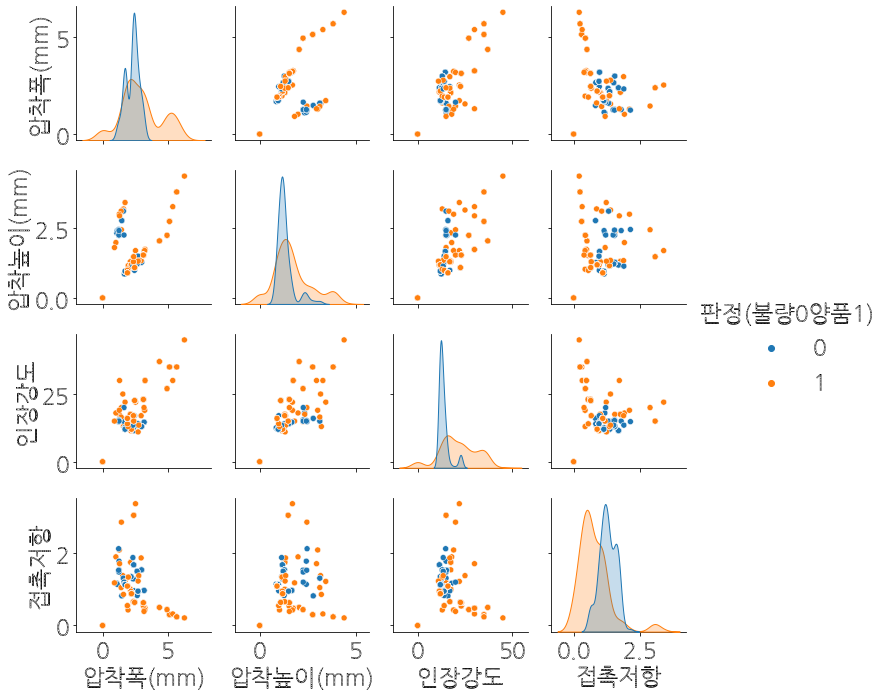

In [ ]:
sns.pairplot(data_set, kind='scatter', hue='판정(불량0양품1)')

In [14]:
data_set.corr()

,압착폭(mm),압착높이(mm),인장강도,접촉저항,판정(불량0양품1)
압착폭(mm),1.000000,0.755629,0.861648,-0.382933,0.268026
압착높이(mm),0.755629,1.000000,0.789497,-0.230026,0.228226
인장강도,0.861648,0.789497,1.000000,-0.428020,0.447602
접촉저항,-0.382933,-0.230026,-0.428020,1.000000,-0.443619
판정(불량0양품1),0.268026,0.228226,0.447602,-0.443619,1.000000


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

In [ ]:
X = data_set.values[:, 0:4]
y = data_set.values[:, 4]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
model.fit(train_X, train_y, epochs=100, batch_size=10)

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2623 - accuracy: 0.5067
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.5336
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.2067 - accuracy: 0.5470
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1987 - accuracy: 0.6678
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1906 - accuracy: 0.7114
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1816 - accuracy: 0.7953
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.7785
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1712 - accuracy: 0.7785
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1663 - accuracy: 0.7987
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.1636 - accuracy: 0.8054
Epoch 11/

In [ ]:
model.evaluate(test_X, test_y)

3/3 [==============================] - 0s 4ms/step - loss: 0.1614 - accuracy: 0.8000


[0.16137129068374634, 0.800000011920929]